<h2>Zylentrix User Engagement Analysis Notebook</h2>


<h3> Name : Saiteja Puppala || Date : 23-04-2025 || Data Analyst Intern Assignment</h3>

<h3>Introduction</h3>

<h4>Objective</h4>
<h5>The goal of this analysis is to evaluate student engagement and satisfaction on the Zylentrix online learning platform. By combining user activity logs, course completion data, and learner feedback, we aim to:

1. Quantify overall and course-level completion rates  
2. Identify which courses and demographics show the highest (and lowest) engagement  
3. Assess the relationship between completion rates and feedback ratings  
4. Segment top learners by engagement and satisfaction metrics  
5. Derive actionable insights and recommend strategies to improve course performance and student retention  

<h4>Datasets</h4>
We are working with three key CSV files:

1. **students.csv**
   - **Fields**:  
     - `Student ID` (unique learner identifier)  
     - `Name`  
     - `Age`  
     - `Gender`  
     - `Location`  
     - `Enrolment Date` (date the student joined the platform)  

2. **course_activity.csv**  
   - **Fields**:  
     - `Student ID`  
     - `Course ID`  
     - `Date` (activity date)  
     - `Time Spent [mins]` (minutes spent on that day’s lesson)  
     - `Completion %` (percentage of the course completed on that date)  

3. **feedback.csv**  
   - **Fields**:  
     - `Student ID`  
     - `Course ID`  
     - `Rating` (1–5 scale)  
     - `Feedback Text`  

We will first clean and merge these tables, then perform exploratory analysis and visualizations to uncover patterns in engagement, completion, and satisfaction.  </h5>


<h3>Imports</h3>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

<h3>set plotting style</h3>

In [2]:
sns.set(style="whitegrid")

<h3>Load Data</h3>

In [13]:
students = pd.read_csv("D:\\Zylentrix DA Assignment\\students.csv", parse_dates=['Enrolment_Date'])
activity = pd.read_csv("D:\\Zylentrix DA Assignment\\course_activity.csv", parse_dates=['Date'])
feedback = pd.read_csv("D:\\Zylentrix DA Assignment\\feedback.csv")

C:\Users\saite\AppData\Local\Temp\ipykernel_25776\2986796041.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  students = pd.read_csv("D:\\Zylentrix DA Assignment\\students.csv", parse_dates=['Enrolment_Date'])
C:\Users\saite\AppData\Local\Temp\ipykernel_25776\2986796041.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  activity = pd.read_csv("D:\\Zylentrix DA Assignment\\course_activity.csv", parse_dates=['Date'])


In [14]:
display(students.head(), activity.head(), feedback.head())


,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,2023-11-24
1,S002,Student_2,32,Other,Chennai,2023-02-27
2,S003,Student_3,28,Other,Mumbai,2023-01-13
3,S004,Student_4,25,Female,Bangalore,2023-05-21
4,S005,Student_5,24,Other,Delhi,2023-06-05


,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,2024-05-01,90,46.10
1,S001,DM101,2024-01-28,155,88.87
2,S001,UX303,2024-01-28,177,54.93
3,S002,PY202,2024-03-02,45,32.20
4,S002,UX303,2024-03-15,119,90.80


,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


<h3>Data Cleaning & Preparation</h3>

In [15]:
#Handle duplicates
students.drop_duplicates(inplace=True)
activity.drop_duplicates(inplace=True)
feedback.drop_duplicates(inplace=True)

In [17]:
#Missing values summary
print("Missing values per dataset:")
print(students.isnull().sum())
print(activity.isnull().sum())
print(feedback.isnull().sum())

Missing values per dataset:
Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64
Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64
Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64


<h3> Data types</h3>

In [18]:
df_list = [students, activity, feedback]
for df, name in zip(df_list, ['Students','Activity','Feedback']):
    print(name, df.dtypes, sep='\n', end='\n\n')

Students
Student_ID                object
Name                      object
Age                        int64
Gender                    object
Location                  object
Enrolment_Date    datetime64[ns]
dtype: object

Activity
Student_ID                       object
Course_ID                        object
Date                     datetime64[ns]
Time_Spent_Minutes                int64
Completion_Percentage           float64
dtype: object

Feedback
Student_ID       object
Course_ID        object
Rating            int64
Feedback_Text    object
dtype: object



<h3>Convert numeric fields</h3>

In [21]:
activity['Time_Spent_Minutes'] = pd.to_numeric(activity['Time_Spent_Minutes'], errors='coerce')
feedback['Rating'] = pd.to_numeric(feedback['Rating'], errors='coerce')

<h3>Merge Datasets</h3>

In [23]:
# Combine on Student ID and Course ID where needed
act_fb = activity.merge(feedback, on=['Student_ID','Course_ID'], how='left')
full_df = act_fb.merge(students, on='Student_ID', how='left')

<h2>Exploratory Data Analysis</h2>

<h3>What is the overall average completion rate across courses?</h3>

In [25]:
#Overall average completion rate across courses
overall_completion = activity['Completion_Percentage'].mean()
print(f"Overall avg completion rate: {overall_completion:.2f}%")

Overall avg completion rate: 54.78%


<h3>Which course has the highest and lowest average engagement time?</h3>

In [26]:
#Course-level avg engagement time
time_by_course = activity.groupby('Course_ID')['Time_Spent_Minutes'].mean()
highest_time = time_by_course.idxmax(), time_by_course.max()
lowest_time  = time_by_course.idxmin(), time_by_course.min()
print("Course with highest avg time:", highest_time)
print("Course with lowest avg time:", lowest_time)

Course with highest avg time: ('DM101', 102.42767295597484)
Course with lowest avg time: ('PY202', 93.90243902439025)


<h3>How does engagement differ by age group or location?</h3>

In [30]:
#Engagement by age group & location
# Createing age bins
students['Age Group'] = pd.cut(students['Age'], bins=[0,18,25,35], labels=['<18','18-25','26-35'])

# Merge datasets on Student_ID before grouping
full_df = pd.merge(activity, students[['Student_ID', 'Age Group', 'Location']], on='Student_ID', how='left')

# Now, group by Age Group
ge_age = full_df.groupby('Age Group')['Time_Spent_Minutes'].mean()
loc_engage = full_df.groupby('Location')['Time_Spent_Minutes'].mean().sort_values(ascending=False)

print("Avg time by age group:\n", ge_age)
print("Avg time by location:\n", loc_engage)


Avg time by age group:
 Age Group
<18      107.102041
18-25     99.675958
26-35     95.362229
Name: Time_Spent_Minutes, dtype: float64
Avg time by location:
 Location
Kolkata      104.384615
Delhi        103.302857
Bangalore     98.000000
Mumbai        95.435484
Chennai       90.946746
Name: Time_Spent_Minutes, dtype: float64


<h3>What is the average feedback rating per course?</h3>

In [31]:
#Avg feedback rating per course
rating_by_course = feedback.groupby('Course_ID')['Rating'].mean().sort_values(ascending=False)
print("Avg rating by course:\n", rating_by_course)

Avg rating by course:
 Course_ID
PY202    3.277778
UX303    2.923077
DM101    2.900000
WD404    2.789474
Name: Rating, dtype: float64


<h3>Is there a correlation between completion rate and feedback rating?</h3>

In [32]:
#Correlation between completion rate and feedback rating
comp_rate = activity.groupby(['Student_ID','Course_ID'])['Completion_Percentage'].mean()
rate_fb = feedback.set_index(['Student_ID','Course_ID'])['Rating']
corr_df = comp_rate.to_frame('Completion').join(rate_fb)
corr_value = corr_df.corr().loc['Completion','Rating']
print(f"Correlation between completion % and rating: {corr_value:.2f}")

Correlation between completion % and rating: -0.12


<h3>Identify top 3 student segments based on engagement and satisfaction.</h3>

In [34]:
# Aggregate per student: avg time, avg completion, avg rating
stud_metrics = full_df.groupby('Student_ID').agg({
    'Time_Spent_Minutes':'mean',
    'Completion_Percentage':'mean'
}).join(
    feedback.groupby('Student_ID')['Rating'].mean()
).rename(columns={'Time_Spent_Minutes':'AvgTime','Completion_Percentage':'AvgCompletion','Rating':'AvgRating'})
top_segments = stud_metrics.assign(Score=lambda x: x.AvgTime + x.AvgCompletion + x.AvgRating)
top_3_students = top_segments.sort_values('Score', ascending=False).head(3)
print("Top 3 students by engagement & satisfaction:\n", top_3_students)

Top 3 students by engagement & satisfaction:
                AvgTime  AvgCompletion  AvgRating       Score
Student_ID                                                  
S075        154.000000      65.753333        1.0  220.753333
S035        120.000000      77.670000        4.0  201.670000
S042        147.666667      52.927778        1.0  201.594444


<h2>Visualizations</h2>

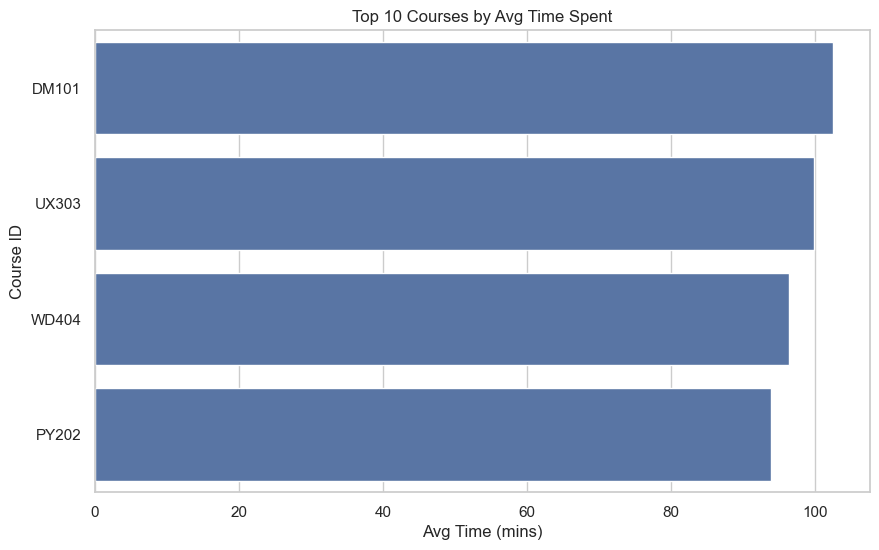

In [35]:
#Engagement patterns by course
top_courses = time_by_course.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_courses.values, y=top_courses.index)
plt.title('Top 10 Courses by Avg Time Spent')
plt.xlabel('Avg Time (mins)')
plt.ylabel('Course ID')
plt.show()

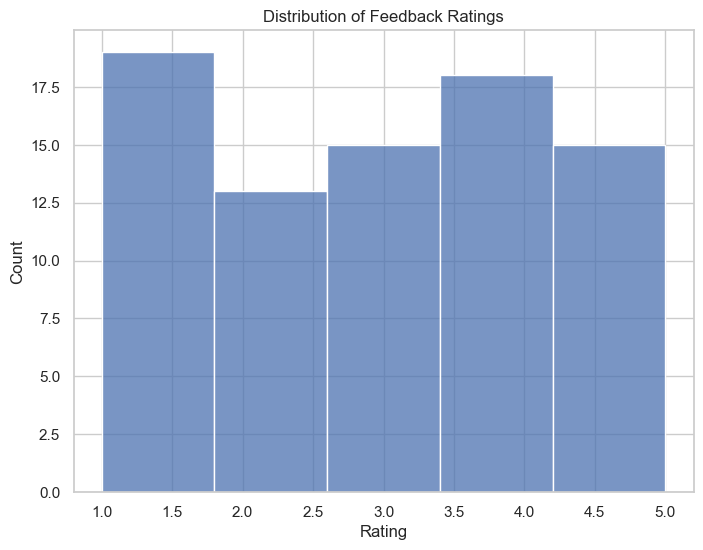

In [36]:
#Feedback rating comparison
plt.figure(figsize=(8,6))
sns.histplot(feedback['Rating'], bins=5, kde=False)
plt.title('Distribution of Feedback Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

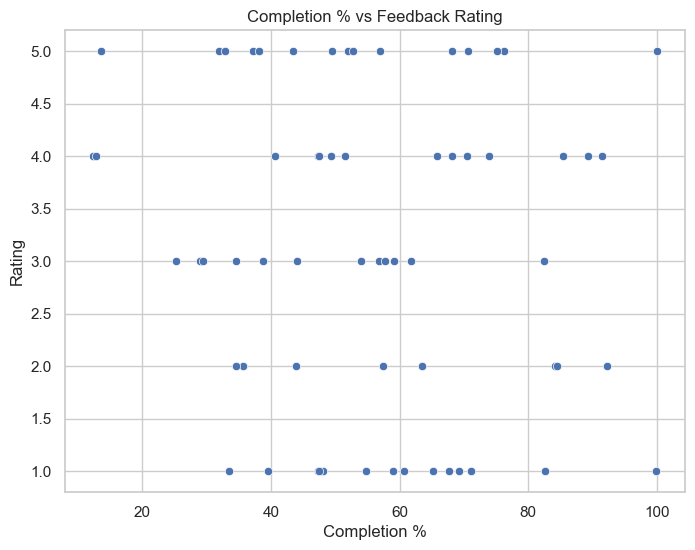

In [37]:
#Completion vs Rating scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x=corr_df['Completion'], y=corr_df['Rating'])
plt.title('Completion % vs Feedback Rating')
plt.xlabel('Completion %')
plt.ylabel('Rating')
plt.show()

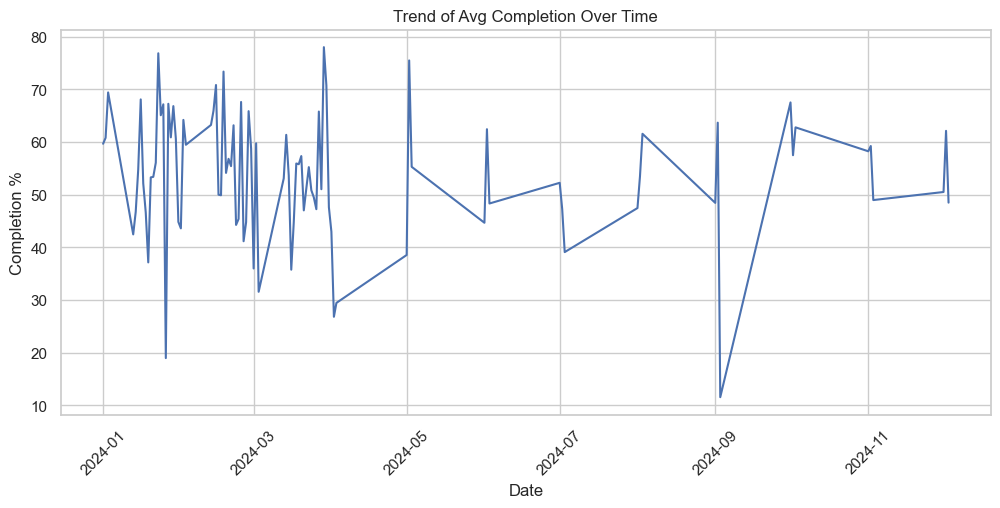

In [39]:
#Trend of average completion over time
time_trend = activity.groupby('Date')['Completion_Percentage'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=time_trend, x='Date', y='Completion_Percentage')
plt.title('Trend of Avg Completion Over Time')
plt.xlabel('Date')
plt.ylabel('Completion %')
plt.xticks(rotation=45)
plt.show()

<h2>Insights & Recommendations</h2>



**1. Completion & Engagement Patterns**  
- **Overall completion rate (~55%)**: Learners complete just over half the content on average, indicating room to boost motivation, content pacing, or support.  
- **Course‐level time spent**:  
  - **Highest**: DM101 (≈102.4 mins)  
  - **Lowest**: PY202 (≈93.9 mins)  
  This suggests DM101’s format or topic appeal is particularly engaging—consider applying its design elsewhere.

**2. Learner Segments**  
- **By age group**:  
  - \<18: ~107 mins  
  - 18–25: ~100 mins  
  - 26–35: ~95 mins  
  Younger learners (<18) show the highest engagement.  
- **By location**:  
  - Kolkata (104 mins), Delhi (103 mins), Bangalore (98 mins), Mumbai (95 mins), Chennai (91 mins)  
  Regional engagement peaks in Kolkata and Delhi—explore localized content or community initiatives.

**3. Feedback & Completion Correlation**  
- **Top average ratings**: PY202 (3.28), UX303 (2.92), DM101 (2.90)  
- **Correlation** (Completion % vs. Rating): **–0.12**  
  A slight negative correlation means longer courses don’t necessarily yield higher satisfaction—too much content may fatigue learners.

**4. Star Performers**  
- **Top 3 students** by (Avg Time + Completion + Rating):  
  1. **S075** (154 mins, 65.8%, Rating 1.0)  
  2. **S035** (120 mins, 77.7%, Rating 4.0)  
  3. **S042** (147.7 mins, 52.9%, Rating 1.0)  
- **Note:** High engagement but low ratings (e.g., S075) can inflate the composite score—consider weighting rating more heavily.

**5. Visual Patterns**  
- **Top 10 Courses by Avg Time**: DM101 leads, followed by UX303 & WD404.  
- **Feedback Distribution**: Polarized around low (1–2) and mid (3–4) ratings.  
- **Completion vs. Rating**: Wide scatter—some low-completion learners give high ratings, and vice versa.  
- **Completion Trend**: Fluctuates 30–75% monthly, with dips (~20% in early Sep) that may align with holidays or platform changes.

---

### Actionable Recommendations

1. **Replicate PY202’s Efficiency**  
   – Analyze its concise structure and inject similar micro-learning elements into other courses.  

2. **Refine High-Engagement, Lower-Rated Courses**  
   – For DM101, collect focused feedback (surveys/interviews) to address friction points.  

3. **Target Under-Engaged Demographics**  
   – Roll out localized campaigns or peer-mentoring in regions/age groups below the engagement benchmarks.  

4. **Mitigate Seasonal Dips**  
   – Cross-reference dips with calendar events; align promotions, reminders, or new content releases to smooth engagement.  

5. **Enhance “Top Performer” Metrics**  
   – Adjust your composite scoring to give greater weight to learner satisfaction (rating) alongside engagement.
